In [3]:
import pandas as pd

# Load the data
file_path = r'C:\Users\James\OneDrive\Desktop\london_weather.csv'
df = pd.read_csv(file_path)

# Check the structure and content of the loaded data
print("Original DataFrame:")
print(df.head())

# Convert the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Filter out only the required data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

# Impute missing values (you may choose appropriate methods for each feature)
df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity, choose appropriate methods

# Display the resulting DataFrame
print("\nProcessed DataFrame:")
print(df.head())


Original DataFrame:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Processed DataFrame:
Empty DataFrame
Columns: [precipitation, mean_temp, min_temp, max_temp, snow_depth]
Index: []


In [4]:
import pandas as pd

# Load the data
file_path = r'C:\Users\James\OneDrive\Desktop\london_weather.csv'
df = pd.read_csv(file_path)

# Check the structure and content of the loaded data
print("Original DataFrame:")
print(df.head())

# Convert the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Set the date column as the index
df.set_index('date', inplace=True)

# Filter out only the required data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

# Impute missing values (you may choose appropriate methods for each feature)
df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity, choose appropriate methods

# Display the resulting DataFrame
print("\nProcessed DataFrame:")
print(df.head())

Original DataFrame:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Processed DataFrame:
            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2000-01-01            0.0        7.0       4.9     

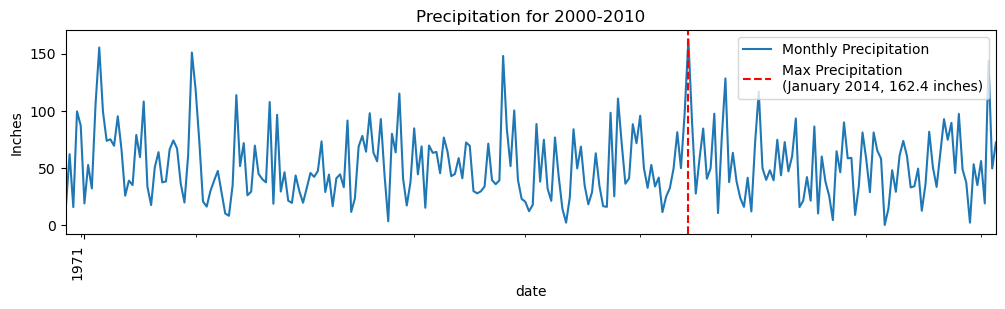

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
precipitation_monthly = df['precipitation'].resample('M').sum()

# Find the date and corresponding value for the max precipitation
max_precipitation_date = precipitation_monthly.idxmax()
max_precipitation_value = precipitation_monthly.max()

# Plot the feature and time period
fig, ax = plt.subplots(figsize=(12, 3))
precipitation_monthly.plot(ax=ax, label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label=f'Max Precipitation\n({max_precipitation_date.strftime("%B %Y")}, {max_precipitation_value} inches)')

# Visualization Requirements
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

# Set major ticks every year and minor ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=-1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))

# Customize ticks to have more hashes on the x-axis
plt.xticks(rotation=90, ha='center')
plt.xticks(rotation=90, ha='center')

fig.autofmt_xdate(rotation=90)
ax.legend()

plt.show()

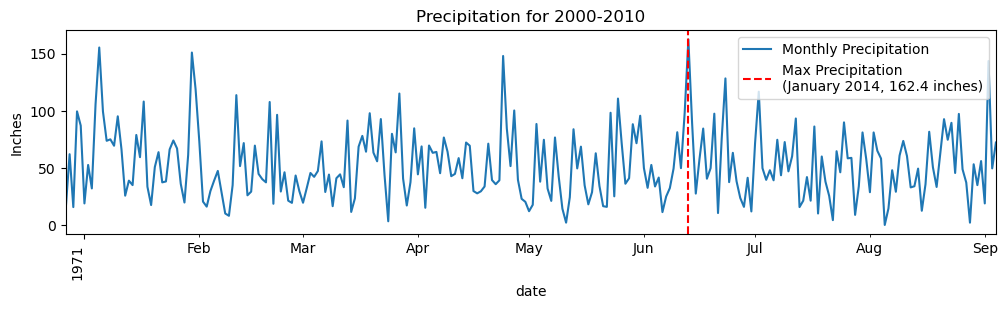

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
precipitation_monthly = df['precipitation'].resample('M').sum()

# Find the date and corresponding value for the max precipitation
max_precipitation_date = precipitation_monthly.idxmax()
max_precipitation_value = precipitation_monthly.max()

# Plot the feature and time period
fig, ax = plt.subplots(figsize=(12, 3))
precipitation_monthly.plot(ax=ax, label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label=f'Max Precipitation\n({max_precipitation_date.strftime("%B %Y")}, {max_precipitation_value} inches)')

# Visualization Requirements
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

# Set major ticks every year and minor ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

fig.autofmt_xdate(rotation=90)
ax.legend()

plt.show()


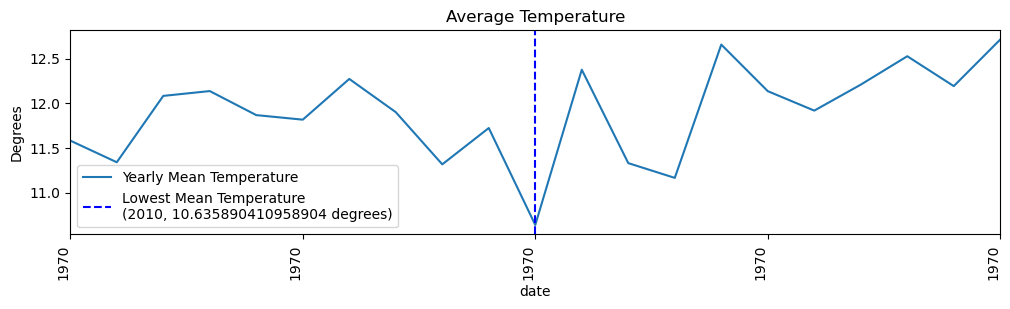

In [6]:
# Resample the mean_temp data to a Yearly frequency using .mean() as the aggregation method
mean_temp_yearly = df['mean_temp'].resample('Y').mean()

# Determine the year and value for the lowest mean temp
lowest_mean_temp_year = mean_temp_yearly.idxmin()
lowest_mean_temp_value = mean_temp_yearly.min()

# Plot the feature and time period
fig, ax = plt.subplots(figsize=(12, 3))
mean_temp_yearly.plot(ax=ax, label='Yearly Mean Temperature')
ax.axvline(lowest_mean_temp_year, color='blue', linestyle='--', label=f'Lowest Mean Temperature\n({lowest_mean_temp_year.strftime("%Y")}, {lowest_mean_temp_value} degrees)')

# Visualization Requirements
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%Y')))
ax.xaxis.set_minor_locator(plt.MaxNLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
fig.autofmt_xdate(rotation=90)
ax.legend()

plt.show()